<a href="https://colab.research.google.com/github/BrianLee0529/Home_sales/blob/main/pretrained_model_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19,
    preprocess_input,
    decode_predictions
)

In [2]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

574710816/574710816 [==============================] - 10s 0us/step


In [3]:
# Define default image size for VGG19
image_size = (224, 224)

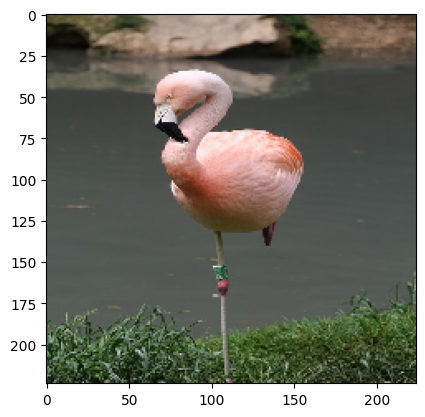

In [8]:
# Load the image and resize to default image size
from urllib.request import urlopen
from io import BytesIO
image_path = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/2/img/bird1.jpg"
with urlopen(image_path) as raw:
    img = image.load_img(BytesIO(raw.read()), target_size=image_size)
plt.imshow(img)

In [9]:
# Preprocess image for model prediction - is 3 dimsnsional
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n02007558', 'flamingo', 0.9658126), ('n01855672', 'goose', 0.010761663), ('n02006656', 'spoonbill', 0.009033228)]]


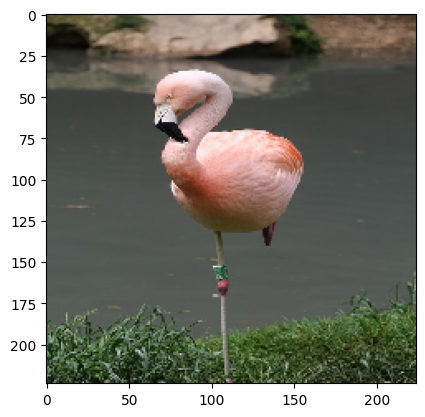

In [10]:
# Make predictions - is 4 dimensionl
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [11]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    with urlopen(image_path) as raw:
        img = image.load_img(BytesIO(raw.read()), target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

1/1 [==============================] - 1s 1s/step
Predicted: [[('n01622779', 'great_grey_owl', 0.9369988), ('n01608432', 'kite', 0.007953623), ('n02018795', 'bustard', 0.006644975)]]


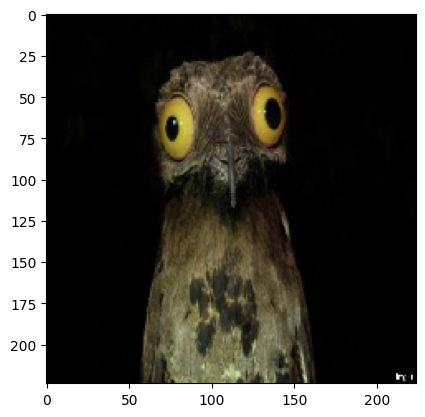

In [12]:
image_path = "https://static.bc-edx.com/data/dl-1-2/m23/lessons/2/img/bird2.jpg"
predict(image_path)